# Observation Angle Model Viewer

## Look at All the Models!

### There's so many and it's a hassle to recreate them every time when I just want to look at them.

In my research, we create a lot of Observation Angle Models of Titan. These models are 3D matrices with incidence, emission, and azimuth angles as coordinates, and the recorded value of I/F. 

These models are created by taking pixels from either real VIMS data or SRTC++ simulations and putting them into 5 degree width bins, and then averaging out over all the pixels put into that pin. 

This notebook is organized like so: the first part just displays whatever you want. The second part displays specific results I think are worthy of talking about.

In [5]:
#CELL 1: READ IN DATA.

import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

finalMatrixHuygens = np.load("HuygensArray.npy")
dataWin5 = np.load("SpecularModelArray.npy")
dataWin5L = np.load("LambertianModelArray.npy")
finalMatrixLake = np.load("NorthLakeArray.npy")
finalMatrixLand = np.load("NorthLandArray.npy")
finalMatrixDunes = np.load("DunesArray.npy")
finalMatrixPlains = np.load("PlainsArray.npy")
finalMatrixHum = np.load("HummockyArray.npy")
finalMatrixXanadu = np.load("XanaduArray.npy")

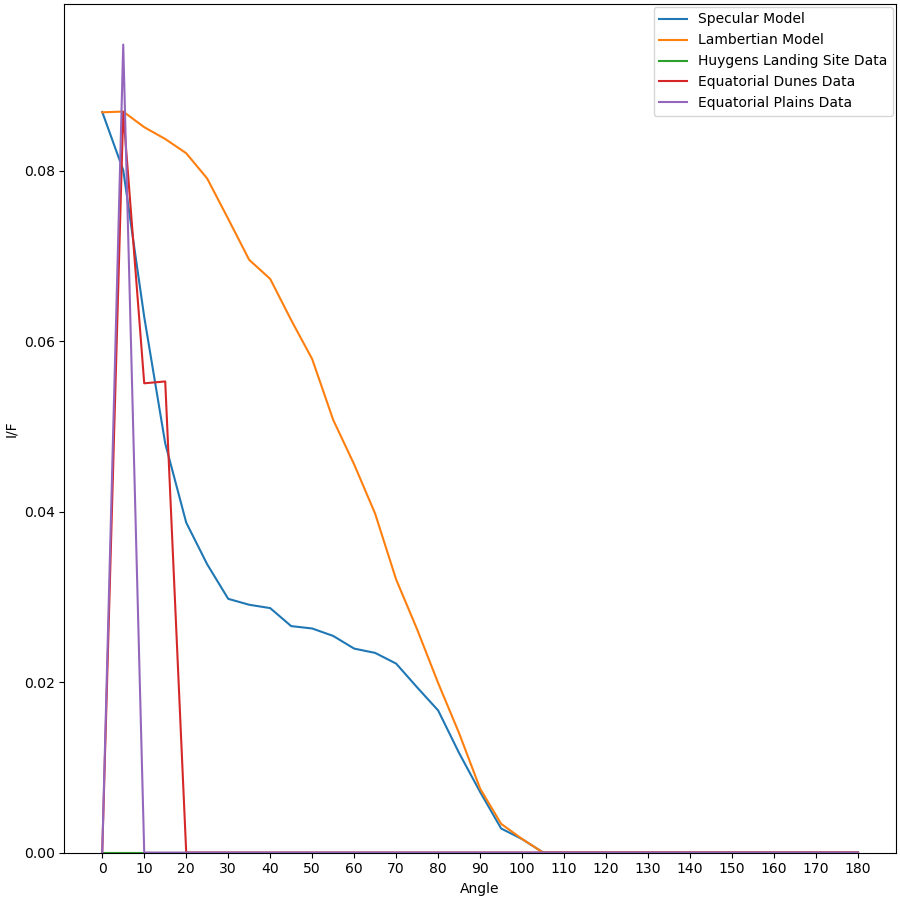

In [8]:
#CELL 2: OMNI DISPLAY: DISPLAYS ALL DATA AT ONCE ADJUSTABLE WITH SLIDERS.
%matplotlib ipympl 
#Allows animation and interaction.

plt.close()
import mpl_interactions.ipyplot as iplt
fig, ax = plt.subplots(figsize = (9,9), layout="constrained") #matplotlib's axis and figure notation is so annoying and obtuse...

angleSpace = np.linspace(0, 180, 37)
inciSpace = np.linspace(0, 100, 21)
emisSpace = np.linspace(0, 90, 19)
azimSpace = np.linspace(0, 180, 37)
typeSpace = np.linspace(1,3,3)

def SM(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(dataWin5[i][emis][azim]*8)
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(dataWin5[inci][i][azim]*8)
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(dataWin5[inci][emis][i]*8)
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine
def LM(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(dataWin5L[i][emis][azim]*8)
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(dataWin5L[inci][i][azim]*8)
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(dataWin5L[inci][emis][i]*8)
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine
def LkD(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixLake[i][emis][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixLake[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixLake[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine
def LnD(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixLand[i][emis][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixLand[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixLand[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def SpecialD(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixHuygens[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixHuygens[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixHuygens[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def eDunes(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixDunes[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixDunes[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixDunes[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def ePlains(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixPlains[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixPlains[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixPlains[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def eHumm(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixHumm[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixHumm[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixHumm[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def eXana(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixXanadu[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixXanadu[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixXanadu[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

angleLabels = [0, 10, 20, 30, 40, 50, 60, 70,
             80, 90, 100, 110, 120, 130, 140, 150,
             160, 170, 180] 

ticker = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]

controls = iplt.plot(SM, inci=inciSpace, emis=emisSpace, azim=azimSpace, types=typeSpace, ax = ax, label="Specular Model")
iplt.plot(LM, controls=controls, ax = ax, label="Lambertian Model")
#iplt.plot(LkD, controls=controls, ax = ax, label="North Pole Lake Data")
#iplt.plot(LnD, controls=controls, ax = ax, label="North Pole Land Data")
iplt.plot(SpecialD, controls=controls, ax = ax, label="Huygens Landing Site Data")
iplt.plot(eDunes, controls=controls, ax = ax, label="Equatorial Dunes Data")
iplt.plot(ePlains, controls=controls, ax = ax, label="Equatorial Plains Data")
#iplt.plot(eHumm, controls=controls, ax = ax, label="Equatorial Hummocky Data")
#iplt.plot(eXana, controls=controls, ax = ax, label="Equatorial Xanadu Data")
#iplt.plot(SpecialD2, controls=controls, ax = ax, label="New 2um Specular Model (Haze 2)")
ax.set(ylim = 0.0,xlabel = "Angle", ylabel = "I/F", xticks = ticker, xticklabels = angleLabels)
fig.legend()
#plt.savefig("TitanColorSchemes.tif", format="tif", bbox_inches='tight')

plt.show()

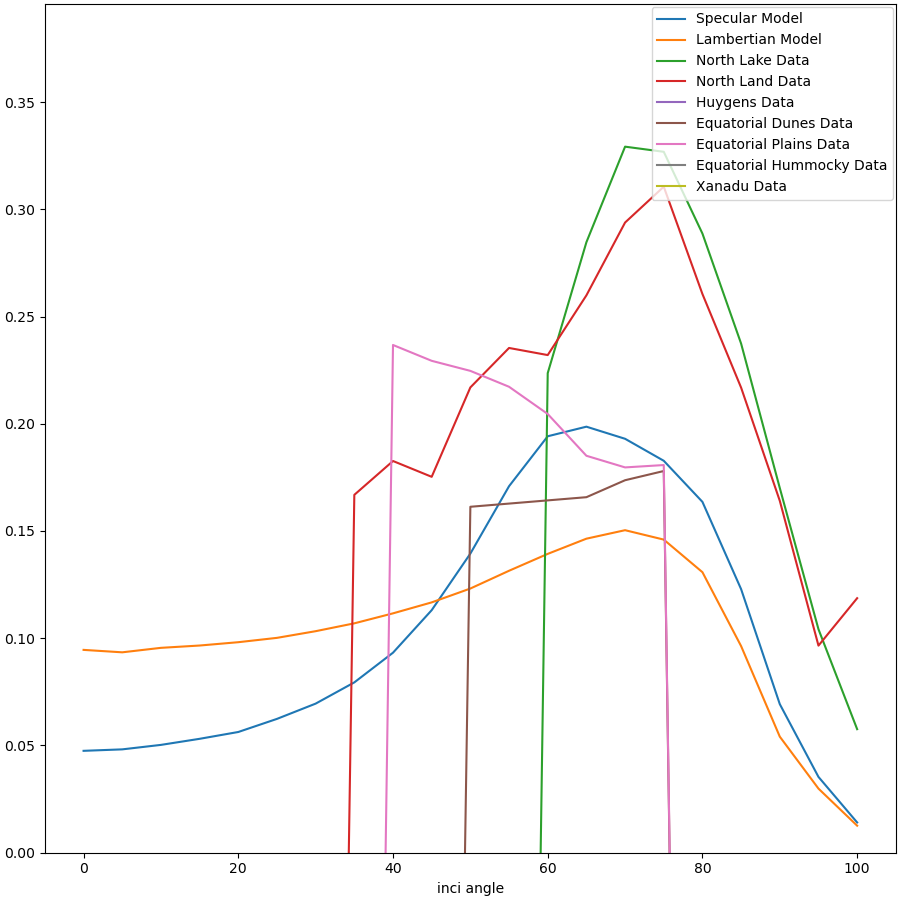

In [12]:
#55

plt.close()
# Getting a Sliced Line through the thing...
sline = "inci" # "inci" "emis" "azim" choose which variable to slice through.
inci = 11 #incidence, 13=65 degrees. This is the index that increments every 5 degrees.
emis = 12 #emission, 12=60 degrees. This is the index that increments every 5 degrees.
azim = 1 #azimuth, 36=180 degrees. This is the index that increments every 5 degrees.

#The variable being sliced through will not be used. 

#Declare Models Here.
specModel = []
lambModel = []
lakeData = []
landData = []
huygensData = []
dunesData = []
plainsData = []
hummData = []
xanaData = []
Eangles = []

#finalMatrixHuygens = np.load("HuygensArray.npy")
#finalMatrixDunes = np.load("DunesArray.npy")
finalMatrixPlains = np.load("PlainsArray.npy")
finalMatrixHum = np.load("HummockyArray.npy")
finalMatrixXanadu = np.load("XanaduArray.npy")

#Load in 
i = 0
if (sline == "inci"):
    while (i < 21):
        specModel.append(dataWin5[i][emis][azim])
        lambModel.append(dataWin5L[i][emis][azim])
        lakeData.append(finalMatrixLake[i][emis][azim])
        landData.append(finalMatrixLand[i][emis][azim])
        huygensData.append(finalMatrixHuygens[i][emis][azim])
        dunesData.append(finalMatrixDunes[i][emis][azim])
        plainsData.append(finalMatrixPlains[i][emis][azim])
        hummData.append(finalMatrixHum[i][emis][azim])
        xanaData.append(finalMatrixXanadu[i][emis][azim])
        Eangles.append(i*5.)
        i=i+1
if (sline == "emis"):
    while (i < 19):
        specModel.append(dataWin5[inci][i][azim])
        lambModel.append(dataWin5L[inci][i][azim])
        lakeData.append(finalMatrixLake[inci][i][azim])
        landData.append(finalMatrixLand[inci][i][azim])
        huygensData.append(finalMatrixHuygens[inci][i][azim])
        dunesData.append(finalMatrixDunes[inci][i][azim])
        plainsData.append(finalMatrixPlains[inci][i][azim])
        hummData.append(finalMatrixHum[inci][i][azim])
        xanaData.append(finalMatrixXanadu[inci][i][azim])
        Eangles.append(i*5.)
        i=i+1
if (sline == "azim"):
    while (i < 37):
        specModel.append(dataWin5[inci][emis][i])
        lambModel.append(dataWin5L[inci][emis][i])
        lakeData.append(finalMatrixLake[inci][emis][i])
        landData.append(finalMatrixLand[inci][emis][i])
        huygensData.append(finalMatrixHuygens[inci][emis][i])
        dunesData.append(finalMatrixDunes[inci][emis][i])
        plainsData.append(finalMatrixPlains[inci][emis][i])
        hummData.append(finalMatrixHum[inci][emis][i])
        xanaData.append(finalMatrixXanadu[inci][emis][i])
        Eangles.append(i*5.)
        i=i+1

fig, ax = plt.subplots(figsize = (9,9), layout="constrained") #matplotlib's axis and figure notation is so annoying and obtuse...

ax.plot(Eangles, np.array(specModel)*8., label="Specular Model")
ax.plot(Eangles, np.array(lambModel)*8., label="Lambertian Model")
ax.plot(Eangles, np.array(lakeData), label="North Lake Data")
ax.plot(Eangles, np.array(landData), label="North Land Data")
ax.plot(Eangles, np.array(huygensData), label="Huygens Data")
ax.plot(Eangles, np.array(dunesData), label="Equatorial Dunes Data")
ax.plot(Eangles, np.array(plainsData), label="Equatorial Plains Data")
ax.plot(Eangles, np.array(hummData), label="Equatorial Hummocky Data")
ax.plot(Eangles, np.array(xanaData), label="Xanadu Data")
ax.set(xlabel = sline + " angle")
fig.legend()

ax.set(ylim = 0.0)

plt.show()